# 預處理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

In [3]:
import os
def read_files(filetype):
    path = '../datasets/aclImdb/'
    file_list = []
    positive_path = path + filetype + '/pos/'
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
    negative_path = path + filetype + '/neg/'
    for f in os .listdir(negative_path):
        file_list += [negative_path + f]
    print('read ', filetype, ' files: ', len(file_list))    
    all_labels = ([1] * 12500 + [0] * 12500)
    all_texts = []
    for fi in file_list:
        with open(fi, encoding = 'utf8',) as file_input:
            all_texts += [rm_tags(' '.join(file_input.readlines()))]
    return all_labels, all_texts

In [4]:
y_train, train_text = read_files('train')

read  train  files:  25000


In [5]:
y_test, test_text = read_files('test')

read  test  files:  25000


In [6]:
# y_train[0]

In [7]:
# train_text[0]

In [8]:
# y_test[0]

In [9]:
# test_text[0]

### Token

In [10]:
token = Tokenizer(num_words = 3800)
token.fit_on_texts(train_text)

In [11]:
# print(token.document_count)

In [12]:
# print(token.word_index)

### Text to List

In [13]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

In [14]:
# print(train_text[0])

In [15]:
# print(x_train_seq[0])

In [16]:
x_train = sequence.pad_sequences(x_train_seq, maxlen = 380)
x_test = sequence.pad_sequences(x_test_seq, maxlen = 380)

In [17]:
# print(x_train_seq[0])

In [18]:
# print(len(x_train_seq[0]))

In [19]:
# print(x_test[0])

In [20]:
# print(len(x_test[0]))

### Scale to Vector

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding

In [22]:
model = Sequential()

### Embedding

In [23]:
model.add(Embedding(
    output_dim = 32,
    input_dim = 3800,
    input_length = 380,
))

In [24]:
model.add(Dropout(0.2))

### Flatten

In [25]:
model.add(Flatten())

### 隱藏層

In [26]:
model.add(Dense(
    units = 256,
    activation = 'relu',
))

In [27]:
model.add(Dropout(0.35))

### 輸出層

In [28]:
model.add(Dense(
    units = 1,
    activation = 'sigmoid',
))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3113216   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 3,235,073
Trainable params: 3,235,073
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [30]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],
)

In [31]:
train_history = model.fit(
    x_train,
    y_train,
    batch_size = 100,
    epochs = 10,
    verbose = 1,
    validation_split = 0.2,
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.4732 - acc: 0.7570 - val_loss: 0.5050 - val_acc: 0.7770
Epoch 2/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1988 - acc: 0.9229 - val_loss: 0.5281 - val_acc: 0.7850
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.0765 - acc: 0.9749 - val_loss: 0.7743 - val_acc: 0.7642
Epoch 4/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.0281 - acc: 0.9922 - val_loss: 0.8358 - val_acc: 0.7940
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.0139 - acc: 0.9963 - val_loss: 1.1101 - val_acc: 0.7646
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.0097 - acc: 0.9972 - val_loss: 1.0194 - val_acc: 0.8022
Epoch 7/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.0098 - acc: 0.9971 - val_loss: 1.1630 - val_acc:

In [32]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

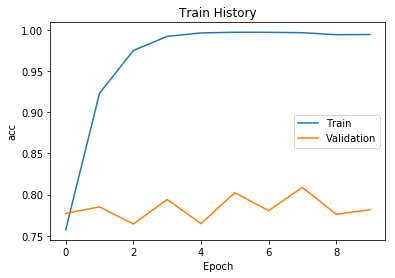

In [33]:
show_train_history(train_history, 'acc', 'val_acc')

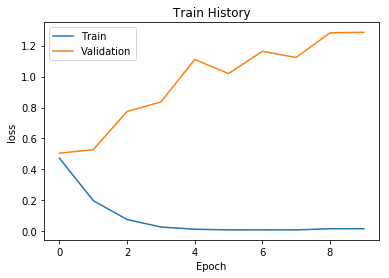

In [34]:
show_train_history(train_history, 'loss', 'val_loss')

In [35]:
scores = model.evaluate(x_test, y_test, verbose = 1)

25000/25000 [==============================] - 13s 514us/step


In [36]:
scores

[0.8471508555862307, 0.84532]

# 預測

In [37]:
prediction = model.predict_classes(x_test)

In [38]:
predict_classes = prediction.reshape(-1)

In [39]:
SentimentDict = {1: 'positive', 0: 'negative'}

In [40]:
def display_test_Sentiment(i):
    print(test_text[i])
    print('\nlabel: %s \nprdict: %s\n' % (SentimentDict[y_test[i]], SentimentDict[predict_classes[i]]))

In [41]:
display_test_Sentiment(0)

Based on an actual story, John Boorman shows the struggle of an American doctor, whose husband and son were murdered and she was continually plagued with her loss. A holiday to Burma with her sister seemed like a good idea to get away from it all, but when her passport was stolen in Rangoon, she could not leave the country with her sister, and was forced to stay back until she could get I.D. papers from the American embassy. To fill in a day before she could fly out, she took a trip into the countryside with a tour guide. "I tried finding something in those stone statues, but nothing stirred in me. I was stone myself." Suddenly all hell broke loose and she was caught in a political revolt. Just when it looked like she had escaped and safely boarded a train, she saw her tour guide get beaten and shot. In a split second she decided to jump from the moving train and try to rescue him, with no thought of herself. Continually her life was in danger. Here is a woman who demonstrated spontane